## 1. Análise Exploratória Preliminar

In [309]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [310]:
df_train = pd.read_csv(os.path.join('../input/petfinder-adoption-prediction/train', 'train.csv'))
df_test = pd.read_csv(os.path.join('../input/petfinder-adoption-prediction/test', 'test.csv'))
df_breed_labels = pd.read_csv(os.path.join('../input/petfinder-adoption-prediction', 'breed_labels.csv'))
df_color_labels = pd.read_csv(os.path.join('../input/petfinder-adoption-prediction', 'color_labels.csv'))

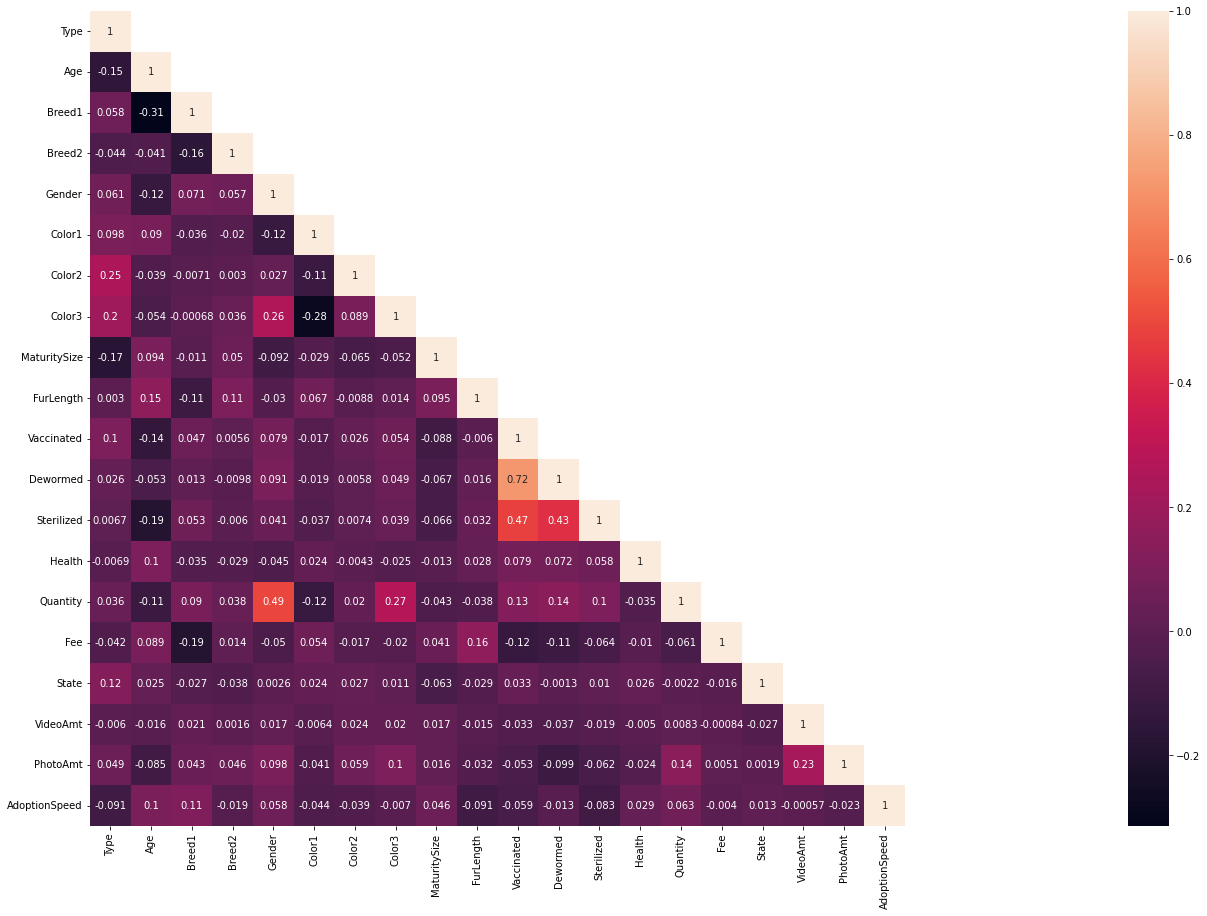

In [311]:
cor_mat = df_train[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(80,15)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True);

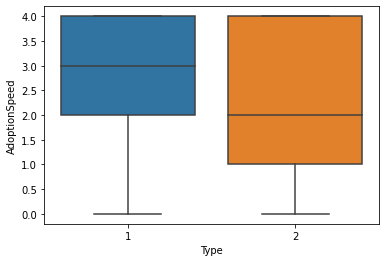

In [312]:
var = 'Type'
data = pd.concat([df_train['AdoptionSpeed'], df_train[var]], axis=1)
plt.xlabel('Type')
plt.ylabel('AdoptionSpeed')
sns.boxplot(x=var, y="AdoptionSpeed", data=data);

In [313]:
df_train.shape, df_test.shape

((14993, 24), (3972, 23))

In [314]:
df_breed_labels.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [315]:
df_train.isnull().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

In [316]:
df_train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [317]:
adoption_0 = (df_train['AdoptionSpeed'] == 0).sum()
adoption_1 = (df_train['AdoptionSpeed'] == 1).sum()
adoption_2 = (df_train['AdoptionSpeed'] == 2).sum()
adoption_3 = (df_train['AdoptionSpeed'] == 3).sum()
adoption_4 = (df_train['AdoptionSpeed'] == 4).sum()
adoption_0, adoption_1, adoption_2, adoption_3, adoption_4

(410, 3090, 4037, 3259, 4197)

### NT: A classe AdoptSpeed 0 é desproporcional as outras.

## Limpeza

In [318]:
df_nlp = df_train[['Description', 'AdoptionSpeed']]
df_nlp.shape

(14993, 2)

In [319]:
df_nlp.head()

,Description,AdoptionSpeed
0,Nibble is a 3+ month old ball of cuteness. He ...,2
1,I just found it alone yesterday near my apartm...,0
2,Their pregnant mother was dumped by her irresp...,3
3,"Good guard dog, very alert, active, obedience ...",2
4,This handsome yet cute boy is up for adoption....,2


### Remoção de descrições vazias

In [320]:
index_delete = np.array(df_nlp[df_nlp['Description'].isnull()].index)
df_nlp = df_nlp.drop(index_delete)

In [321]:
index_adoption_0 = np.array(df_nlp[df_nlp['AdoptionSpeed'] == 0].index)
index_adoption_1 = np.array(df_nlp[df_nlp['AdoptionSpeed'] == 1].index)
index_adoption_2= np.array(df_nlp[df_nlp['AdoptionSpeed'] == 2].index)
index_adoption_3 = np.array(df_nlp[df_nlp['AdoptionSpeed'] == 3].index)
index_adoption_4 = np.array(df_nlp[df_nlp['AdoptionSpeed'] == 4].index)
index_adoption_1_reduc = [index_adoption_1[i] for i in range(int(len(index_adoption_0)))]
index_adoption_2_reduc = [index_adoption_2[i] for i in range(int(len(index_adoption_0)))]
index_adoption_3_reduc = [index_adoption_3[i] for i in range(int(len(index_adoption_0)))]
index_adoption_4_reduc = [index_adoption_4[i] for i in range(int(len(index_adoption_0)))]

X = pd.concat([df_nlp['Description'].reindex(index_adoption_0), df_nlp['Description'].reindex(index_adoption_1_reduc),
               df_nlp['Description'].reindex(index_adoption_2_reduc), df_nlp['Description'].reindex(index_adoption_3_reduc),
               df_nlp['Description'].reindex(index_adoption_4_reduc)])

y = pd.concat([df_nlp['AdoptionSpeed'].reindex(index_adoption_0), df_nlp['AdoptionSpeed'].reindex(index_adoption_1_reduc),
               df_nlp['AdoptionSpeed'].reindex(index_adoption_2_reduc), df_nlp['AdoptionSpeed'].reindex(index_adoption_3_reduc),
               df_nlp['AdoptionSpeed'].reindex(index_adoption_4_reduc)])
X.shape, y.shape

((2050,), (2050,))

In [322]:
X.head()

1      I just found it alone yesterday near my apartm...
75     Hi Coco is a rescued puppy from the streets. I...
106    Kittens found living at restaurant, with sibli...
170    *** Looking for someone who really love and ad...
259                               Chanelle found a home!
Name: Description, dtype: object

### Splitting

In [323]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1640,), (1640,), (410,), (410,))

In [324]:
X_train.head()

1621    Kittens found in the front yard of my house, o...
103                                          For Adoption
1469    Raven is a stray dog that joined us for a walk...
1161    Rescued from road side with heavy traffic when...
585     Found this cute, little ginger kitten in the c...
Name: Description, dtype: object

## Pre-processamento

In [325]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

### Tokenização

In [326]:
# Fonte: Stackoverflow
def tokenize_util(data):
    docs = [word_tokenize(i) for i in data]
    alpha_tokens = [[j.lower() for j in i if j.isalpha() == True] for i in docs]
    
    lemmatizer = WordNetLemmatizer()
    lem_tokens = [[lemmatizer.lemmatize(alpha) for alpha in doc] for doc in alpha_tokens]

    return [" ".join(x_t) for x_t in lem_tokens]

In [327]:
X_valid_tokens = tokenize_util(X_valid)
X_train_tokens = tokenize_util(X_train)

### Pipeline

In [328]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

vct = CountVectorizer(stop_words='english', lowercase=False)
svd = TruncatedSVD(n_components=200, random_state=42)
tfvec = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=False)

preprocessing_pipe = Pipeline([
    ('vectorizer', tfvec),
    ('svd', svd)   
])

In [329]:
lsa_train = preprocessing_pipe.fit_transform(X_train_tokens)
lsa_train.shape

(1640, 200)

c:\Users\joaod\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


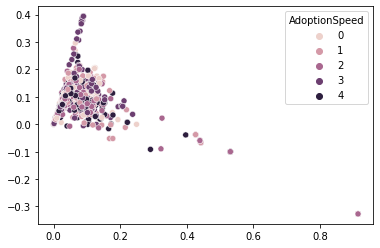

In [330]:
sns.scatterplot(lsa_train[:, 0], lsa_train[:, 1], hue=y_train);

In [331]:
components = pd.DataFrame(data=svd.components_, columns=preprocessing_pipe.named_steps['vectorizer'].get_feature_names())

c:\Users\joaod\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


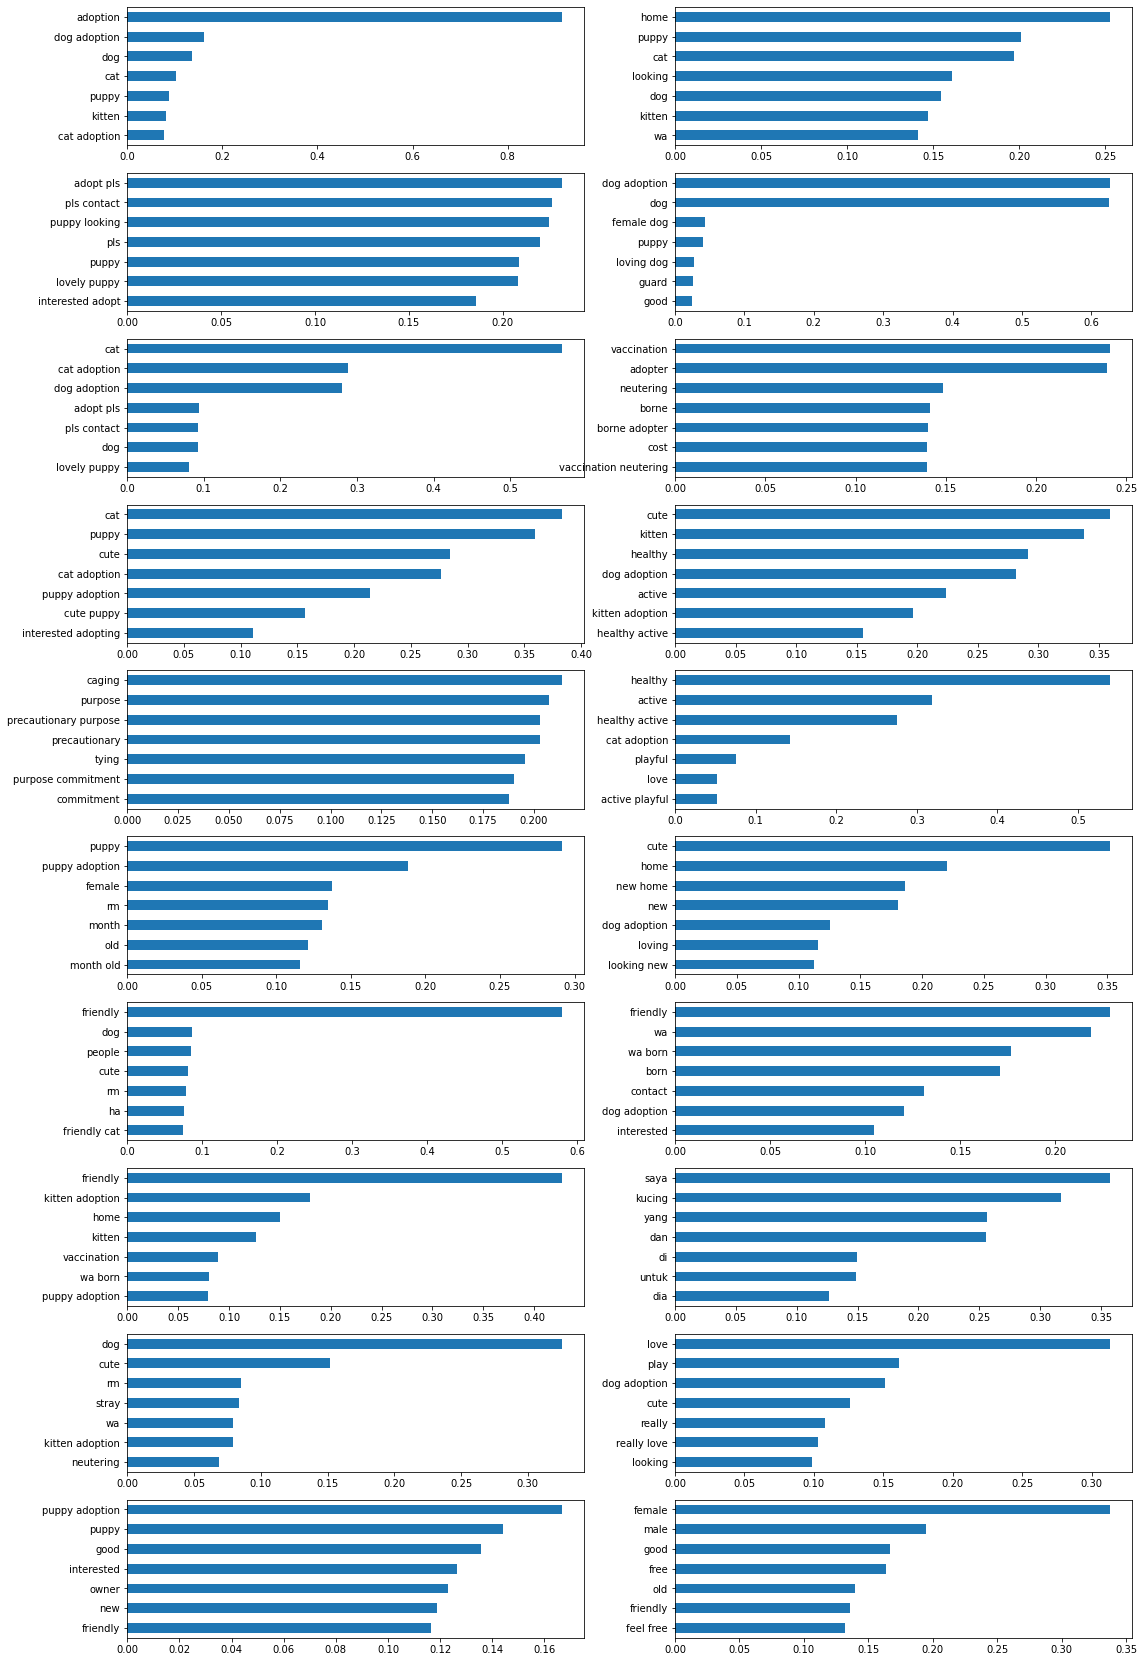

In [332]:
fig, axes = plt.subplots(10, 2, figsize=(18, 30))
for i, ax in enumerate(axes.flat):
    components.iloc[i].sort_values(ascending=False)[:7].sort_values().plot.barh(ax=ax)

### Criação de modelo em NLP

In [333]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

mb = MultinomialNB()
rf = RandomForestClassifier()
pipe = Pipeline([
    ('vectorizer', tfvec),
    ('rf', mb)
])

In [334]:
pipe.fit(X_train_tokens, y_train)
y_pred = pipe.predict(X_valid_tokens)

### Relatório de classificação

In [335]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.39      0.39        82
           1       0.28      0.13      0.18        82
           2       0.22      0.23      0.22        82
           3       0.31      0.49      0.38        82
           4       0.34      0.29      0.31        82

    accuracy                           0.31       410
   macro avg       0.31      0.31      0.30       410
weighted avg       0.31      0.31      0.30       410



## Resultados

In [336]:
df_train = df_train.drop(['Name', 'Description', 'RescuerID', 'PetID'], axis=1)
df_test = df_test.drop(['Name', 'Description'], axis=1)
X_test = df_test.drop(['RescuerID', 'PetID'], axis=1)

In [337]:
X = df_train.drop('AdoptionSpeed', axis=1)
y = df_train['AdoptionSpeed']

In [338]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [339]:
## Data spliting 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, shuffle=y, random_state=42)
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((11244, 19), (11244,)), ((3749, 19), (3749,)))

In [340]:
## Data well-balanced
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
X_valid_sm, y_valid_sm = smote.fit_resample(X_valid, y_valid)

### Machine Learning Model 

In [341]:
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

In [342]:
rf = RandomForestClassifier(max_depth=6, n_estimators=24, max_features=19, random_state=1)
rf.fit(X_train_sm, y_train_sm)
y_predic = rf.predict(X_train_sm)
acc_score = accuracy_score(y_train_sm, y_predic)
acc_score_valid = accuracy_score(y_valid_sm, rf.predict(X_valid_sm))
acc_score, acc_score_valid

(0.4432931156848829, 0.4211087420042644)

In [343]:
xgb = XGBClassifier(max_depth=3, n_estimators=200, learning_rate=0.19, random_state=42)
xgb.fit(X_train_sm, y_train_sm)
y_predic = xgb.predict(X_train_sm)
acc_score = accuracy_score(y_train_sm, y_predic)
acc_score_valid = accuracy_score(y_valid_sm, xgb.predict(X_valid_sm))
acc_score, acc_score_valid

(0.5693399574166075, 0.5115138592750533)

In [344]:
y_pred_true = xgb.predict(X_test.to_numpy())

In [345]:
model_submission  = pd.DataFrame(y_pred_true).apply(np.round)
submission = pd.DataFrame(
    data={"PetID" : df_test["PetID"], 
    "AdoptionSpeed" : model_submission[0]}
)
submission.AdoptionSpeed = submission.AdoptionSpeed.astype(int)
submission.to_csv("submission.csv", index=False)
